<a href="https://colab.research.google.com/github/Catower917/Camouflage-binary-classification/blob/main/camo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [18]:
cd /content/drive/MyDrive/Data

/content/drive/MyDrive/Data


In [6]:
!wget https://www.kaggle.com/imneonizer/normal-vs-camouflage-clothes/download/archive.zip

--2021-03-14 04:51:56--  https://www.kaggle.com/imneonizer/normal-vs-camouflage-clothes/download/archive.zip
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fimneonizer%2Fnormal-vs-camouflage-clothes%3Fresource%3Ddownload%2Farchive.zip [following]
--2021-03-14 04:51:56--  https://www.kaggle.com/account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fimneonizer%2Fnormal-vs-camouflage-clothes%3Fresource%3Ddownload%2Farchive.zip
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘archive.zip’

archive.zip             [ <=>                ]   7.55K  --.-KB/s    in 0.007s  

2021-03-14 04:51:

In [13]:
!ls /content/drive/MyDrive/Data

archive.zip  Fish.csv


In [14]:
!unzip -qq /content/drive/MyDrive/Data/archive.zip

In [21]:
!ls /content/drive/MyDrive/Data/camo

camouflage_clothes  normal_clothes


In [ ]:
from PIL import Image
import os, glob, sys, numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

img_dir = '/content/drive/MyDrive/Data/camo'
categories = ['camouflage_clothes', 'normal_clothes']
np_classes = len(categories)

image_w = 64
image_h = 64


pixel = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    img_dir_detail = img_dir + "/" + cat
    files = glob.glob(img_dir_detail+"/*.jpg")


    for i, f in enumerate(files):
        try:
            img = Image.open(f)
            img = img.convert("RGB")
            img = img.resize((image_w, image_h))
            data = np.asarray(img)
            #Y는 0 아니면 1이니까 idx값으로 넣는다.
            X.append(data)
            y.append(idx)
            if i % 300 == 0:
                print(cat, " : ", f)
        except:
            print(cat, str(i)+" 번째에서 에러 ")
X = np.array(X)
Y = np.array(y)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

xy = (X_train, X_test, Y_train, Y_test)
np.save("/content/drive/MyDrive/Data/camo/numpy_data/binary_image_data.npy", xy)

camouflage_clothes  :  /content/drive/MyDrive/Data/camo/camouflage_clothes/0000.jpg
camouflage_clothes  :  /content/drive/MyDrive/Data/camo/camouflage_clothes/0001195.jpg
camouflage_clothes  :  /content/drive/MyDrive/Data/camo/camouflage_clothes/0001552.jpg
camouflage_clothes  :  /content/drive/MyDrive/Data/camo/camouflage_clothes/0001893.jpg
camouflage_clothes  :  /content/drive/MyDrive/Data/camo/camouflage_clothes/000225.jpg
camouflage_clothes  :  /content/drive/MyDrive/Data/camo/camouflage_clothes/0002596.jpg
camouflage_clothes  :  /content/drive/MyDrive/Data/camo/camouflage_clothes/0002939.jpg


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

np.load.__defaults__=(None, True, True, 'ASCII')
X_train, X_test, y_train, y_test = np.load('/content/drive/MyDrive/Data/camo/numpy_data/binary_image_data.npy')
np.load.__defaults__=(None, False, True, 'ASCII')

print(X_train.shape)
print(X_train.shape[0])
print(np.bincount(y_train))
print(np.bincount(y_test))

(14308, 64, 64, 3)
14308
[7130 7178]
[819 771]


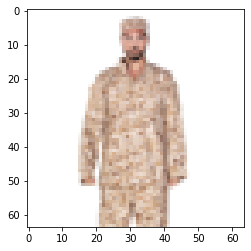

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])
plt.show()

In [8]:
from keras.models import Sequential
import os
image_w = 64
image_h = 64
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
    
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
model_dir = './model'
if not os.path.exists(model_dir):
  os.mkdir(model_dir)
model_path = model_dir + "/camo_classify.model"
    
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=7)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0

In [90]:
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.15, callbacks=[checkpoint, early_stopping])

Epoch 1/50
191/191 [==============================] - 2s 10ms/step - loss: 0.0872 - accuracy: 0.9678 - val_loss: 0.1044 - val_accuracy: 0.9637

Epoch 00001: val_loss did not improve from 0.10014
Epoch 2/50
191/191 [==============================] - 2s 9ms/step - loss: 0.0752 - accuracy: 0.9731 - val_loss: 0.1169 - val_accuracy: 0.9613

Epoch 00002: val_loss did not improve from 0.10014
Epoch 3/50
191/191 [==============================] - 2s 9ms/step - loss: 0.0655 - accuracy: 0.9759 - val_loss: 0.0990 - val_accuracy: 0.9679

Epoch 00003: val_loss improved from 0.10014 to 0.09895, saving model to ./model/camo_classify.model
INFO:tensorflow:Assets written to: ./model/camo_classify.model/assets
Epoch 4/50
191/191 [==============================] - 2s 9ms/step - loss: 0.0608 - accuracy: 0.9776 - val_loss: 0.2196 - val_accuracy: 0.9227

Epoch 00004: val_loss did not improve from 0.09895
Epoch 5/50
191/191 [==============================] - 2s 9ms/step - loss: 0.0559 - accuracy: 0.9788 - va

In [91]:
print("정확도 : %.2f " %(model.evaluate(X_test, y_test)[1]))

50/50 [==============================] - 0s 4ms/step - loss: 0.0739 - accuracy: 0.9717
정확도 : 0.97 


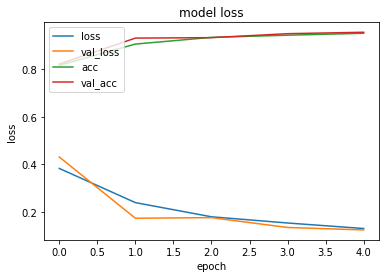

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss', 'acc', 'val_acc'], loc='upper left')
plt.show()

In [113]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf

seed = 5
tf.random.set_seed(seed)
np.random.seed(seed)

caltech_dir = '/content/drive/MyDrive/Data/camo/test'


image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(caltech_dir+"/*/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)

    filenames.append(f)
    X.append(data)


X = np.array(X)

X = X.astype(float) / 255
model = load_model('/content/model/camo_classify.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

cnt = 0
for i in prediction:
  if i >= 0.5:
    print(filenames[cnt].split("/")[7]+"   "+filenames[cnt].split("/")[8] + "  이미지는 normal 로 추정됩니다.")
  else:
    print(filenames[cnt].split("/")[7]+"   "+filenames[cnt].split("/")[8] + "  이미지는 camouflage 으로 추정됩니다.")
    cnt += 1
   
#음성 -> camo
#양성 -> normal

camoyflage   camo1.jpg  이미지는 camouflage 으로 추정됩니다.
camoyflage   camo3.jpg  이미지는 camouflage 으로 추정됩니다.
camoyflage   camo2.jpeg  이미지는 camouflage 으로 추정됩니다.
camoyflage   0005.jpg  이미지는 camouflage 으로 추정됩니다.
camoyflage   0003.jpg  이미지는 camouflage 으로 추정됩니다.
camoyflage   0000.jpg  이미지는 camouflage 으로 추정됩니다.
camoyflage   0007.jpg  이미지는 camouflage 으로 추정됩니다.
camoyflage   00011.jpg  이미지는 camouflage 으로 추정됩니다.
camoyflage   00021.jpg  이미지는 camouflage 으로 추정됩니다.
camoyflage   00014.jpg  이미지는 camouflage 으로 추정됩니다.
camoyflage   00016.jpg  이미지는 camouflage 으로 추정됩니다.
camoyflage   00024.jpg  이미지는 camouflage 으로 추정됩니다.
camoyflage   00022.jpg  이미지는 camouflage 으로 추정됩니다.
camoyflage   00023.jpg  이미지는 camouflage 으로 추정됩니다.
camoyflage   00010.jpg  이미지는 camouflage 으로 추정됩니다.
camoyflage   00015.jpg  이미지는 camouflage 으로 추정됩니다.
camoyflage   0001.jpg  이미지는 camouflage 으로 추정됩니다.
camoyflage   00020.jpg  이미지는 camouflage 으로 추정됩니다.
normal   normal2.jpg  이미지는 normal 로 추정됩니다.
normal   normal2.jpg  이미지는 camouflage 으로 추정됩니다.
normal   norm